In [3]:
import numpy as np
from matplotlib import pyplot as plt
import NavigatingTheMatrix as nvm

import os


In [4]:
def mtrx_to_npy(dir_path, trace, plane_level = True, scan_line_align = True, standard_pix_ratio=512/100):
    '''
    Converts a directory of .Z_mtrx scans to npy arrays and returns them in dictionary.
    NOTE: can only do the trace up or the trace down (+retrace) of each scan. This is on purpose incase some scans only have one or the other.
    args:
        dir_path (str): path to directory where the .Z_mtrx files are
        trace (str): 'trace up' or 'trace down' to signify which you want to save. If you select 'trace down' and some of the files down have 
                     a trace down, or it is incomplete, then those scans will be ignored.
        standard_pix_ratio (float/tuple/list): ratio of pixels to nm desired in image (should maybe get rid of this to allow of easier processing of larger images).
    returns:
        scans (dict): a dictionary with the file name (minus the .Z_mtrx) as the keys, and a numpy array with the trace and retrace as a numpy 
                      of shape (2, res, res).
    '''

    # check validity of trace variable
    if trace == 'trace up':
        pass
    elif trace == 'trace down':
        pass
    else:
        raise ValueError('trace must be either "trace up" or "trace down"')

    # make a dictionary of the scans you want to stitch
    scans = {}
    
    # Loop through the files in the directory and open all
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)
        if filename[-7:] == '.Z_mtrx':
            if os.path.isfile(file_path):
                # Add the file to the dictionary
                try:
                    scan_dict = {'file': file_path, 
                                    'standard_pix_ratio': standard_pix_ratio
                                    }
                    print('Loading file: ' , filename[:-7])
                    scans[filename[:-7]] = nvm.STM( scan_dict )
                except Exception as e:
                    print('Error loading file: ', filename[:-7])
                    print('Error message: ', e)
                    continue
    # tidy up the scans and correct hysteresis
    files_to_delete = []
    for filename,scan in scans.items():
        print('Performing plane level, scan line align, and hysteresis correction on image: ', filename)
        if trace == 'trace up':
            scan.clean_up(scan.trace_up, 'trace up', plane_level=plane_level, scan_line_align = scan_line_align)
            scan.clean_up(scan.retrace_up, 'retrace up', plane_level=plane_level, scan_line_align = scan_line_align)        
           # scan.trace_up_proc, scan.retrace_up_proc, corrected, k3_1 = scan.correct_hysteresis(scan.trace_up_proc, scan.retrace_up_proc, 'trace up')
        elif trace == 'trace down':         
            try:
                scan.clean_up(scan.trace_down, 'trace down', plane_level=plane_level, scan_line_align = scan_line_align)
                scan.clean_up(scan.retrace_down, 'retrace down', plane_level=plane_level, scan_line_align = scan_line_align)
             #   scan.trace_down_proc, scan.retrace_down_proc, corrected, k3_2 = scan.correct_hysteresis(scan.trace_down_proc, scan.retrace_down_proc, 'trace down')
            except AttributeError:
                print('No trace down for scan: ', filename)
                files_to_delete.append(filename)
                continue
    
    # delete the files that don't have a trace down
    for filename in files_to_delete:
        del scans[filename]

    # keep only the numpy array
    numpy_scan_fwd = {}
    numpy_scan_bwd = {}
    for filename, scan in scans.items():
        if trace == 'trace up':
            trace_fwd = scan.trace_up_proc
            trace_bwd = scan.retrace_up_proc
        else:
            try:
                trace_fwd = scan.trace_down_proc
                trace_bwd = scan.retrace_down_proc
            except KeyError:
                pass

        numpy_scan_fwd[filename] = trace_fwd
        numpy_scan_bwd[filename] = trace_bwd

    return numpy_scan_fwd, numpy_scan_bwd
    

In [27]:
scansfwd_up, scansbwd_up = mtrx_to_npy(r'C:\Users\nkolev\OneDrive - University College London\Documents\GitHub\NavigatingTheMatrix\SR_experimental_data\128\\', 'trace up',standard_pix_ratio=(128/100,512/100) )

scansfwd_down, scansbwd_down = mtrx_to_npy(r'C:\Users\nkolev\OneDrive - University College London\Documents\GitHub\NavigatingTheMatrix\SR_experimental_data\128\\', 'trace down',standard_pix_ratio=(128/100,512/100) )


Loading file:  20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--10_1
standard pix ratio:  (1.28, 5.12)
standard_pix_ratio is a tuple. The first element is the x ratio and the second element is the y ratio.
Loading file:  20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--19_1
standard pix ratio:  (1.28, 5.12)
standard_pix_ratio is a tuple. The first element is the x ratio and the second element is the y ratio.


Loading file:  20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--3_1
standard pix ratio:  (1.28, 5.12)
standard_pix_ratio is a tuple. The first element is the x ratio and the second element is the y ratio.
Loading file:  20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--6_1
standard pix ratio:  (1.28, 5.12)
standard_pix_ratio is a tuple. The first element is the x ratio and the second element is the y ratio.
Loading file:  20250515-094444_S20250514BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--3_2
standard pix ratio:  (1.28, 5.12)
standard_pix_ratio is a tuple. The first element is the x ratio and the second element is the y ratio.
Pixel to nm ratio in y direction is 27pixels for every 100nm in the  trace down
trace down scan was interupted before completion. It will not be used.
Pixel to nm ratio in y direction is 27pixels for every 100nm in the  retrace down
retrace down scan was interupted before completion. It will not be used.
Loading file:  20250515-1

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--10_1
(128, 512)


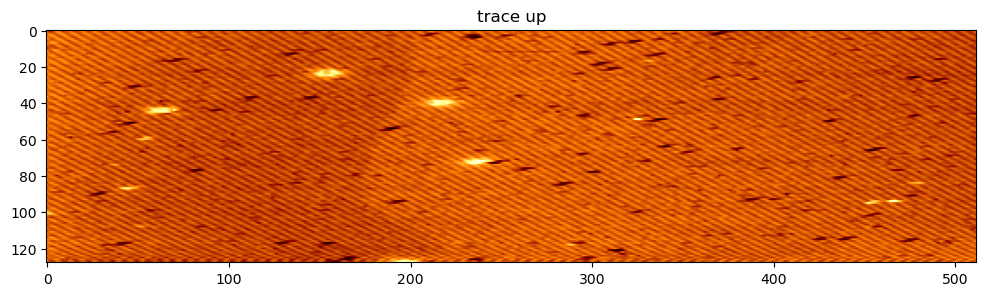

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--19_1
(64, 256)


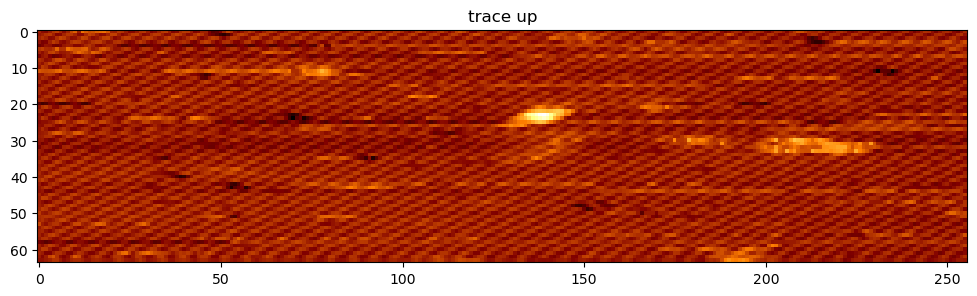

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--3_1
(64, 256)


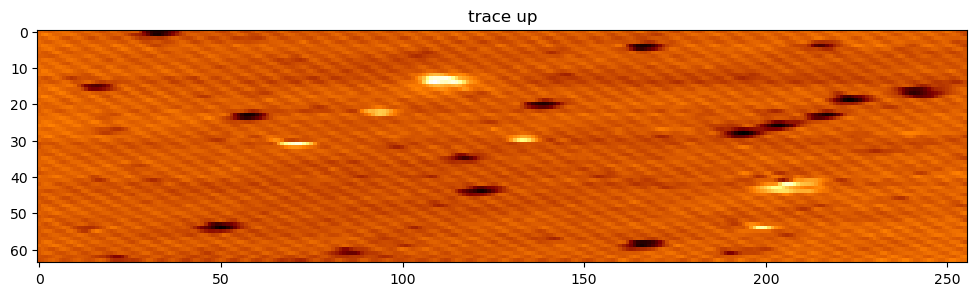

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--6_1
(64, 256)


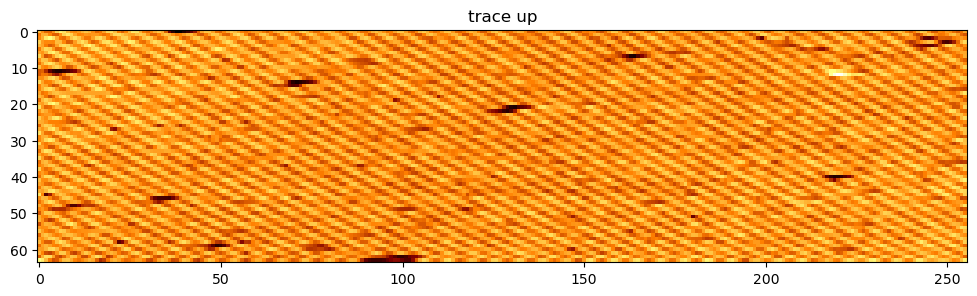

20250515-094444_S20250514BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--3_2
(128, 512)


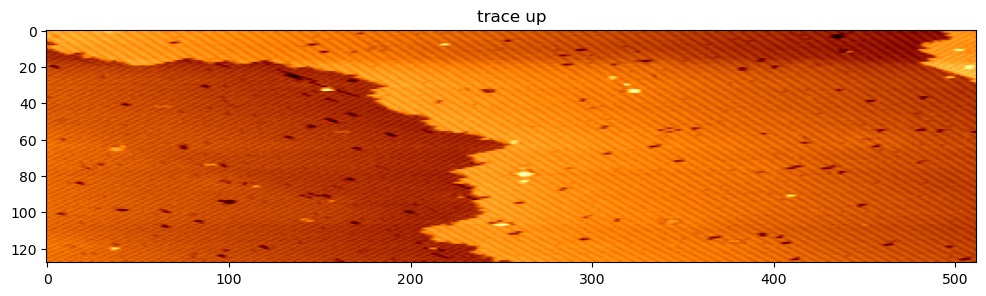

20250515-185018_S20250504BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--30_1
(128, 512)


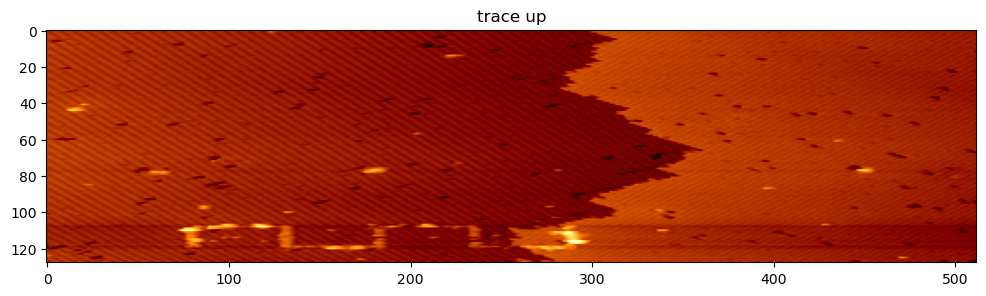

20250626-135600_S20250625BMB-PeckhamRyeII-Si(001)HAsH3--STM_AtomManipulation--51_1
(128, 512)


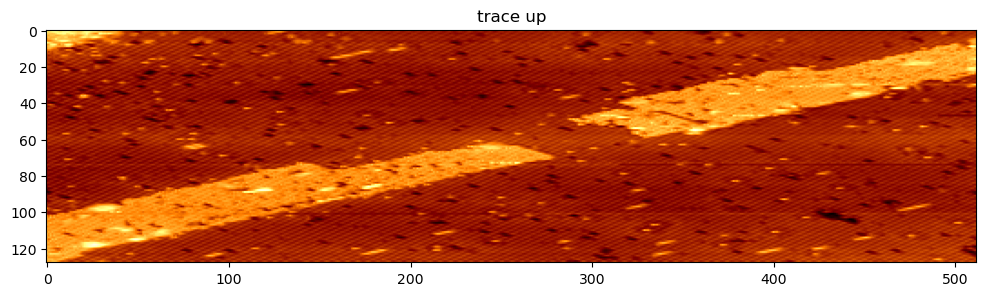

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--10_1
(128, 512)


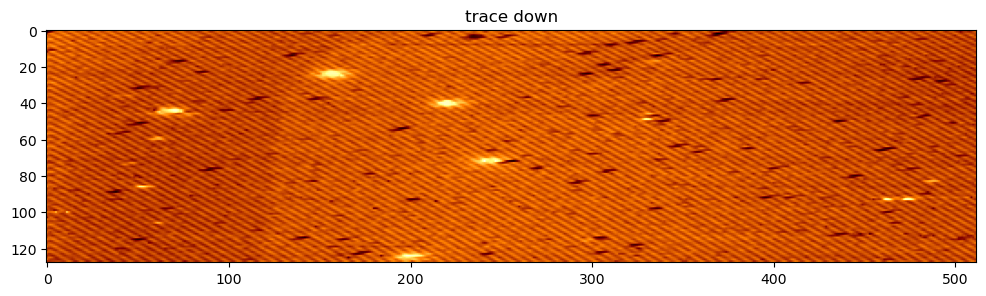

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--19_1
(64, 256)


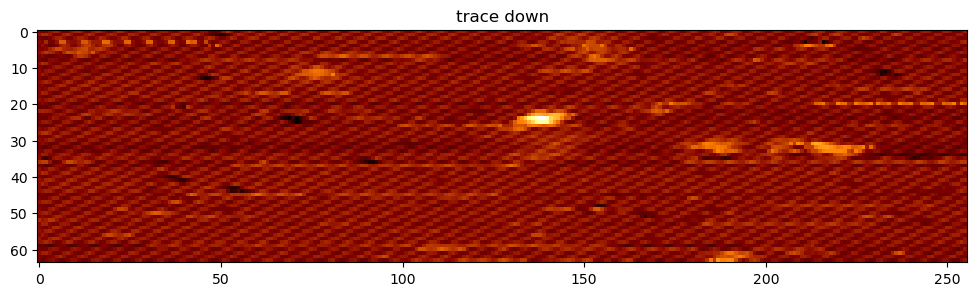

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--3_1
(64, 256)


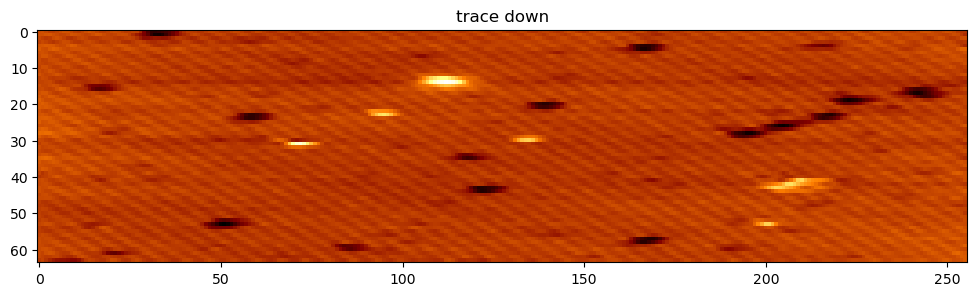

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--6_1
(64, 256)


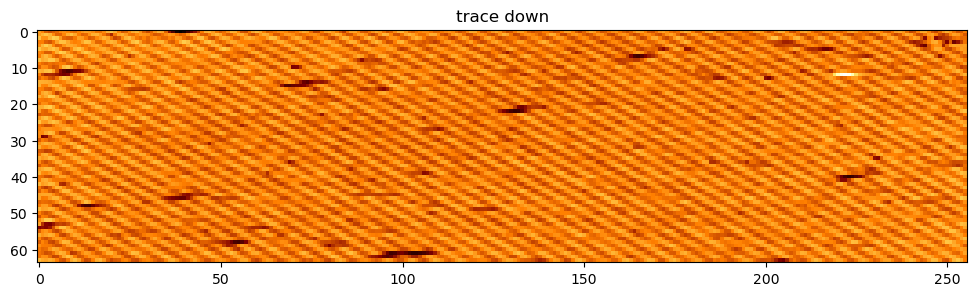

In [28]:
for filename, scan in scansfwd_up.items():
    print(filename)
    print(scan.shape)
    plt.figure(figsize=(12,12))
    plt.imshow(scan[:,:], cmap='afmhot')
    plt.title('trace up')
    plt.show()

for filename, scan in scansfwd_down.items():
    print(filename)
    print(scan.shape)
    plt.figure(figsize=(12,12))
    plt.imshow(scan[:,:], cmap='afmhot')
    plt.title('trace down')
    plt.show()

In [ ]:
for filename, scan in scansbwd.items():
    print(filename)
    plt.figure(figsize=(20,20))
    plt.imshow(scan[:,:], cmap='afmhot')
    plt.title('retrace')
    plt.show()
    print(scan.shape)

In [29]:
i=0


j=0
for filename,scan in scansfwd_up.items():
    #if filename[-4:] == '16_4':
    #    print(filename[-4:])
    #    pass
    #else:
    # 
       # plt.figure(figsize=(20,20))
       # plt.imshow(scan[:,:], cmap='afmhot')
       # plt.title(filename)
       # plt.show()
    print(filename+'_'+str(j))
    np.save(f'{filename}_{j}.npy', scan[:,:])

j=2
for filename,scan in scansfwd_down.items():
    #if filename[-4:] == '16_4':
    #    print(filename[-4:])
    #    pass
    #else:
    # 
       # plt.figure(figsize=(20,20))
       # plt.imshow(scan[:,:], cmap='afmhot')
       # plt.title(filename)
       # plt.show()
    print(filename+'_'+str(j))
    np.save(f'{filename}_{j}.npy', scan[:,:])

20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--10_1_0
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--19_1_0
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--3_1_0
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--6_1_0
20250515-094444_S20250514BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--3_2_0
20250515-185018_S20250504BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--30_1_0
20250626-135600_S20250625BMB-PeckhamRyeII-Si(001)HAsH3--STM_AtomManipulation--51_1_0
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--10_1_2
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--19_1_2
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--3_1_2
20250417-121359_S20250411BMB - Hanwell--STM_AtomManipulation--6_1_2


In [14]:
i=0
j=1

for filename, scan in scansbwd.items():
   # if filename == '20181019-110413_STM_AtomManipulation-earls court-Si(100)-H--76_1':
    #    np.save(f'{filename}_{j}.npy', scan[250:1600,:])
   # else:
   print(filename+'_'+str(j))
   np.save(f'{filename}_{j}.npy', scan[:,:])

20250515-185018_S20250504BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--26_4_1
20250515-185018_S20250504BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--28_1_1
20250515-185018_S20250504BMF-FinchleyRoadSi(001)HAsH3--STM_AtomManipulation--30_1_1


In [11]:
scansfwd_tensors = {k: torch.tensor(v) for k, v in scansfwd.items()}
scansbwd_tensors = {k: torch.tensor(v) for k, v in scansbwd.items()}

In [13]:
ex = scansfwd_tensors['20200217-105833_Hainault-Si(001)-H-AsH3--30_2']

In [54]:
np.save('20240212-151153_Isand Gardens VI Si(001)-H+PH3--STM_AtomManipulation--16_4_0.npy', np.expand_dims(scans1['20240212-151153_Isand Gardens VI Si(001)-H+PH3--STM_AtomManipulation--16_4'][0,:,:], axis=0))
np.save('20240212-151153_Isand Gardens VI Si(001)-H+PH3--STM_AtomManipulation--16_4_1.npy', np.expand_dims(scans1['20240212-151153_Isand Gardens VI Si(001)-H+PH3--STM_AtomManipulation--16_4'][1,:,:], axis=0))


In [8]:
import random
import torch 
from scipy.ndimage import gaussian_filter, median_filter

In [ ]:
for file in os.listdir('filled_real_PDNet'):
    img = np.load('filled_real_PDNet/'+file)
    plt.figure(figsize=(20,20))
    plt.imshow(img, cmap='afmhot')
    title = file + ' ' + str(img.shape[0]) + ' ' + str(img.shape[1])
    plt.title(title)
    plt.show()

In [ ]:
for image in os.listdir("large_scans_npy/clean/"):
    im = np.load("large_scans_npy/clean/" + image)
    print(im.shape)
    plt.figure(figsize=(20,20))
    plt.imshow(im, cmap='afmhot')
    plt.title(image)
    plt.show()